<a href="https://colab.research.google.com/github/WizardResearcher442/Pytorch-Journey/blob/main/torch_journey_dataset_et_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#code for processing data samples can get messy and hard to maintain; we ideally want ou dataset code
#to be decoupled from our model trianing as much as possible
#Pytorch provides two data priomitives: torch.utils.data.DataLoader and torch.utils.Dataset
#that allow you to use preloaded and your own dataset.
#Dataset stores the samples and their correponding labels, and
# DataLoader wraps an iterable around the dataset to enable access to the samples.

#Pytorch domain libraries provides a number nof preloaded datasets such as Fashion-MNIST
#that succlass torch.utils.Dataset and implement functions specific to the particular data.
#Thesy can be used to protype and benchmark your model.
#You can find them here : Image Dataset


In [11]:
#Loading Dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
  root="data",
  train= False,
  download=True,
  transform=ToTensor()
)

test_data= datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

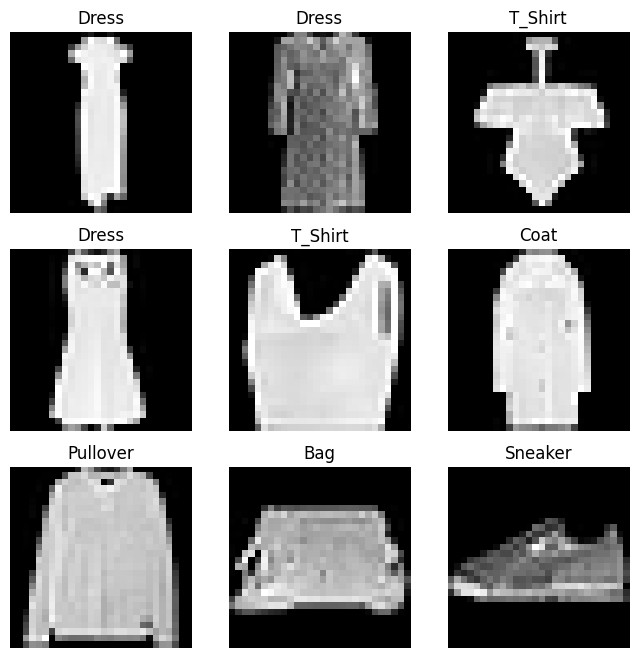

In [12]:
#Iterating and visualising the Dataset
#we can index the Dataset manually like a list: training_data[index].
#We use matplotl;ib to visualize some samples in our taining data.

labels_map = {
    0: "T_Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
}

figure = plt.figure(figsize=(8,8))
cols ,rows = 3,3
for i in range(1, cols * rows + 1 ):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

